In [64]:
from skimage import data, io, filters, novice
from scipy import ndimage
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import LinAlgError

import seaborn as sns
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import bayes_matting

# Bayes Matting Steps

In [180]:
mean_F = np.array([150, 150, 150])
cov_F = np.array([[20, 5, 5], [5, 30, 8], [5, 8, 25]])

mean_B = np.array([50, 50, 200])
cov_B = np.array([[5, 0, 0], [0, 5, 0], [0, 0, 15]])

try:
    inv_cov_B = np.linalg.inv(cov_B)
    inv_cov_F = np.linalg.inv(cov_F)
except LinAlgError:
    print("LinAlgError")
    
alpha = 0.5
color = np.array([50, 50, 70])
sigma_d = 5

for i in range(100):
    f, b = bayes_matting.calculate_fg(color, alpha, mean_F, inv_cov_F, mean_B, inv_cov_B, sigma_d)
    alpha = bayes_matting.calculate_alpha(color, f, b)

print("Alpha: {}".format(alpha))
print("F: {}\nB: {}".format(f, b))
print("Re-Test: {}".format(alpha * f + (1 - alpha) * b))

Alpha: 0.82101485326
F: [ 106.47739705   94.80750333   96.53736141]
B: [  48.35070263   48.69149604  195.25267638]
Re-Test: [  96.07358212   86.553423    114.20593655]


# $\sigma_d$ Experiments

In [141]:
mean_F = np.array([150, 150, 150])
cov_F = np.array([[20, 5, 5], [5, 30, 8], [5, 8, 25]])

mean_B = np.array([50, 50, 200])
cov_B = np.array([[5, 0, 0], [0, 5, 0], [0, 0, 15]])

try:
    inv_cov_B = np.linalg.inv(cov_B)
    inv_cov_F = np.linalg.inv(cov_F)
except LinAlgError:
    print("LinAlgError")

alpha = 0.5

### Similar to foreground

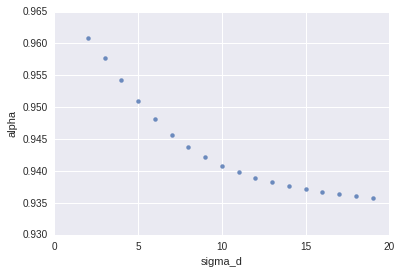

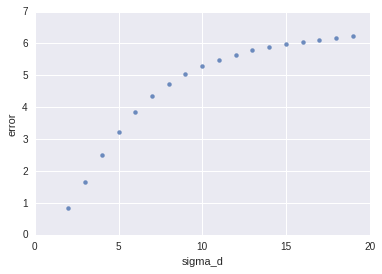

In [208]:
color = np.array([140, 140, 140])
plot_alpha_over_sigma_d(color, alpha, mean_F, inv_cov_F, mean_B, inv_cov_B)

### Similar to background

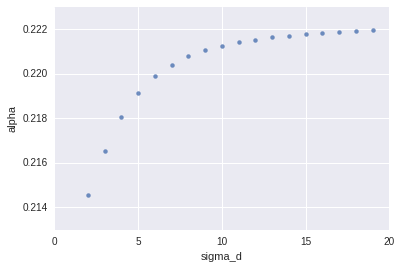

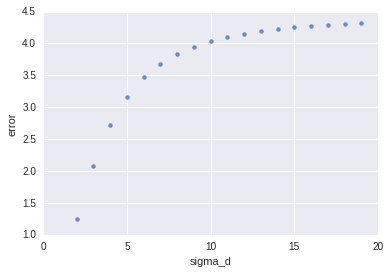

In [207]:
color = np.array([70, 70, 180])
plot_alpha_over_sigma_d(color, alpha, mean_F, inv_cov_F, mean_B, inv_cov_B)

### Mixed color

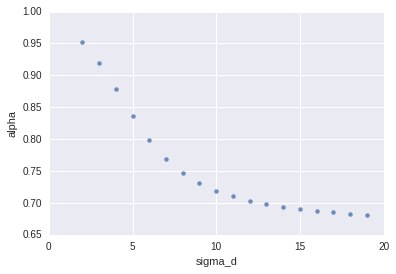

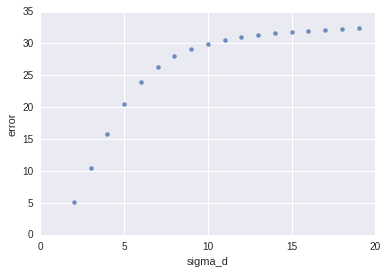

In [206]:
color = np.array([100, 100, 100])
plot_alpha_over_sigma_d(color, alpha, mean_F, inv_cov_F, mean_B, inv_cov_B) 

In [205]:
def plot_alpha_over_sigma_d(color, alpha, mean_F, inv_cov_F, mean_B, inv_cov_B):
    sigma_ds, alphas, errors = [], [], []
    for sigma_d in range(2, 20):
        for i in range(1000):
            f, b = bayes_matting.calculate_fg(color, alpha, mean_F, inv_cov_F, mean_B, inv_cov_B, sigma_d)
            alpha = bayes_matting.calculate_alpha(color, f, b)

        sigma_ds.append(sigma_d)
        alphas.append(alpha)
        errors.append(np.mean((abs(color - (alpha * f + (1 - alpha) * b)))))

    d = {'sigma_d': pd.Series(sigma_ds),
         'alpha': pd.Series(alphas),
         'error': pd.Series(errors)}
    df = pd.DataFrame(d)
    sns.regplot(x='sigma_d', y='alpha', data=df, fit_reg=False)
    sns.plt.show()
    sns.regplot(x='sigma_d', y='error', data=df, fit_reg=False)

# Full Bayes Matting Examples

Iteration 0
Iteration 1
Iteration 2


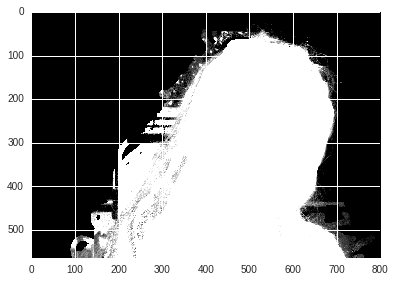

In [210]:
img = io.imread("Bayes/doll.png")
tri = io.imread("Bayes/doll_tri.png")
io.imshow(bayes_matting.bayes_matting(img, tri, it=3, sigma_d=1))

Iteration 0
Iteration 1
Iteration 2


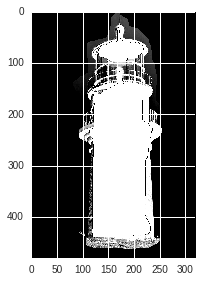

In [209]:
img = io.imread("Bayes/lighthouse-input.png")
tri = io.imread("Bayes/lighthouse-trimap.png")
io.imshow(bayes_matting.bayes_matting(img, tri, it=3, sigma_d=2))

Iteration 0
Iteration 1
Iteration 2


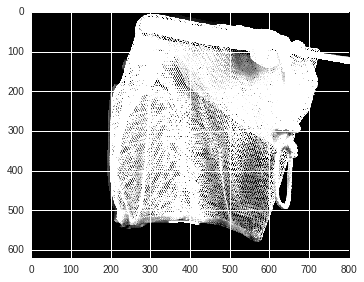

In [138]:
img = io.imread("Bayes/net.png")
tri = io.imread("Bayes/net_tri.png")
io.imshow(bayes_matting.bayes_matting(img, tri, it=3, sigma_d=10))